<h1>  Analyse et classification des résultats d'examen </h1>
<h3> importer les bibliothèques de base et charger l'ensemble de données </h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("StudentsPerformance.csv")
data.head(6)

Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


<h3>Vérifiez la taille de l'ensemble de données et décrivez les variables numériques </h3>

In [ ]:
print(data.shape)
print(data.describe())
print(data.info())

(1000, 8)
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int6

<h3>Appelez un pairplot pour obtenir la corrélation entre les variables numériques : scores en mathématiques, en lecture et en écriture </h3>

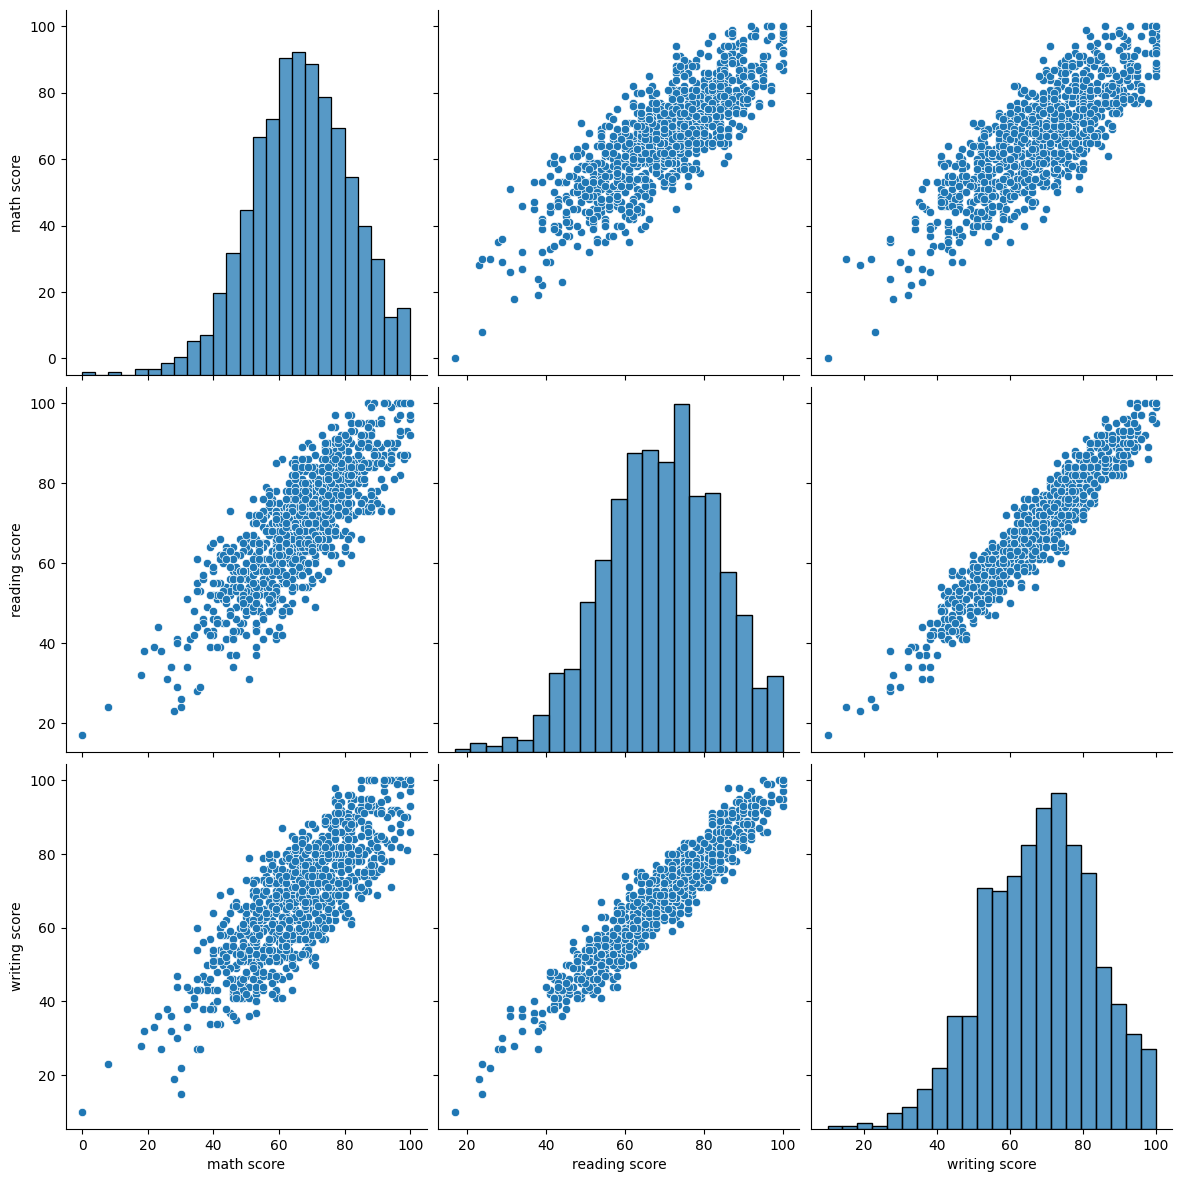

In [ ]:
sns.pairplot(data[['math score', 'reading score', 'writing score']], height = 4)

<h3>ajouter des colonnes pour les notes de chaque examen :  </h3>
<h5> >90 = A, >80 = B, >70 = C, >60 = D, >50 = E, <=50 = F </h5>

In [ ]:
def ScoreMark(score):
    if ( score > 90 ):
        mark = 'A'
    elif ( score > 80):
        mark = 'B'
    elif ( score > 70):
        mark = 'C'
    elif ( score > 60):
        mark = 'D'
    elif ( score > 50):
        mark = 'E'
    else:
        mark = 'F'
    return mark

data['math mark'] = data['math score'].apply(lambda s: ScoreMark(s))
data['reading mark'] = data['reading score'].apply(lambda s: ScoreMark(s))
data['writing mark'] = data['writing score'].apply(lambda s: ScoreMark(s))


<h3> Tracer des histogrammes pour les notes et les résultats des examens </h3>

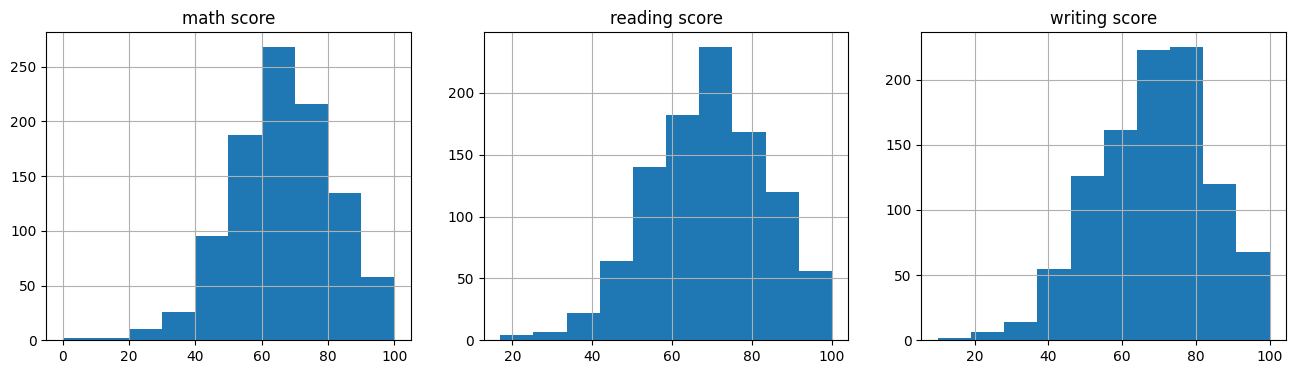

In [ ]:

figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math score', 'reading score', 'writing score']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    data[i].hist()
    n = n + 1


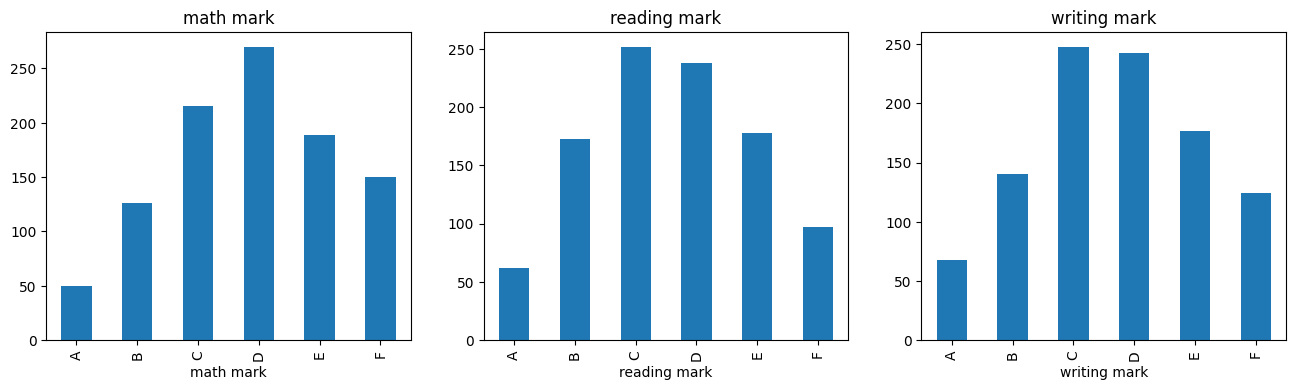

In [ ]:
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math mark', 'reading mark', 'writing mark']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    data[i].value_counts().sort_index().plot(kind="bar")
    n = n + 1

<h3>Définissez la fonction Boxplot pour tracer les trois scores d'examen pour différentes variables, vérifiez la médiane et les quartiles des scores. </h3>

In [ ]:
def boxpl(dt, x_cols, y_cols):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=20)
            n = n + 1

<h3> Vérifiez la répartition des quartiles des notes d'examen en fonction du sexe et de la race </h3>

<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

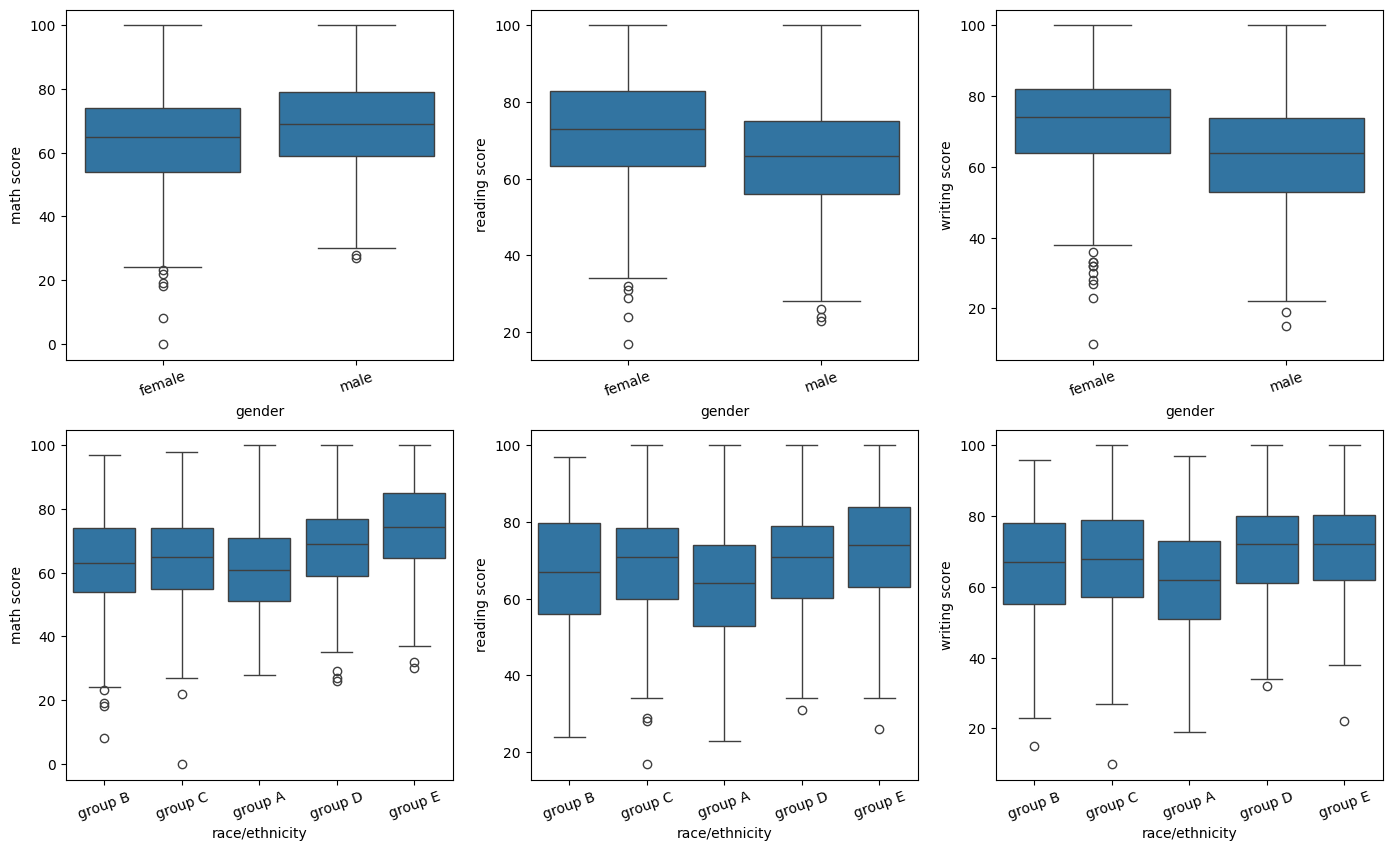

In [ ]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['gender', 'race/ethnicity']
boxpl(data, x_cols, y_cols)

<h3> Vérifiez la répartition des quartiles de score d'examen pour le cours de préparation aux tests et les variables du déjeuner </h3>

<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

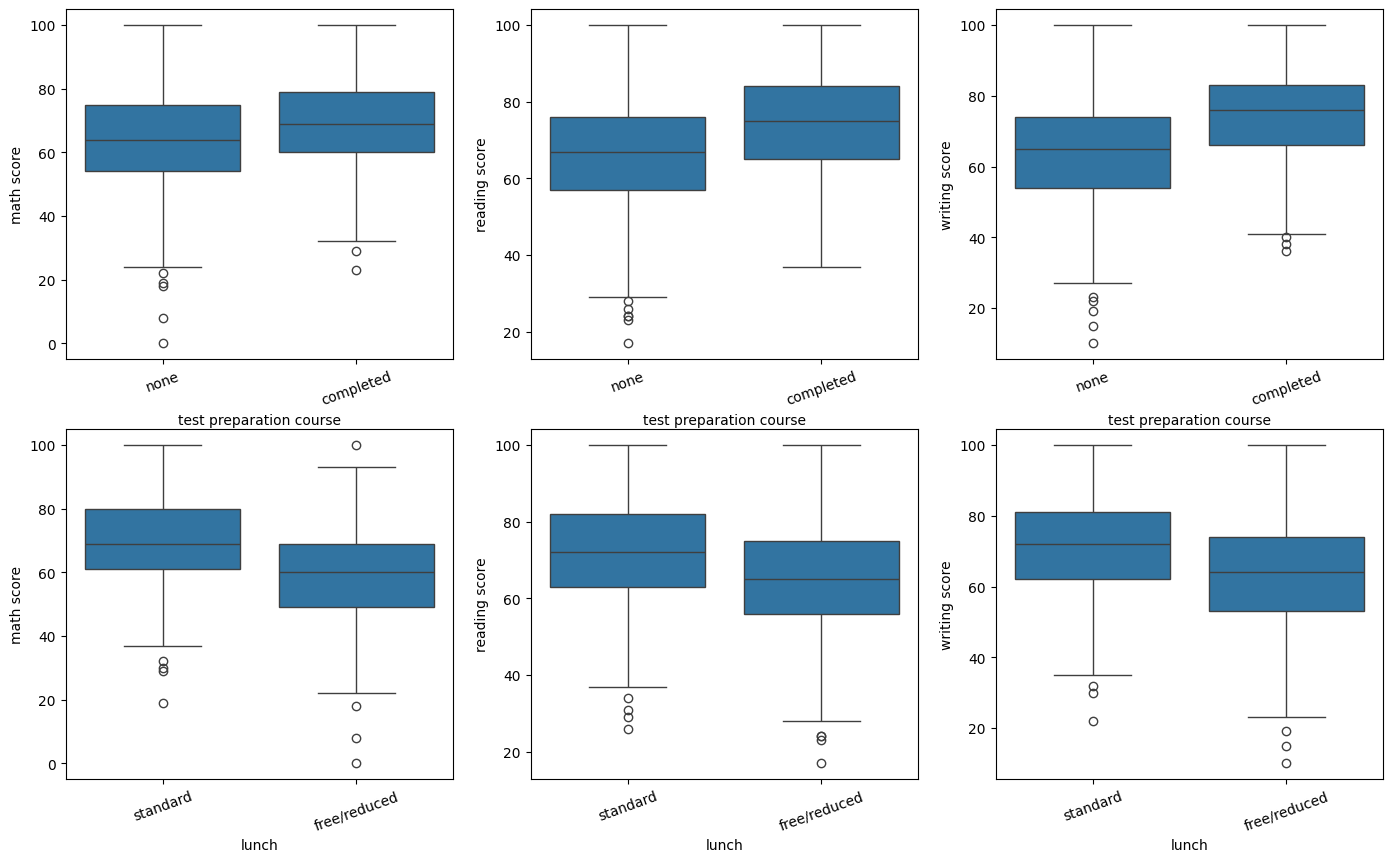

In [ ]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['test preparation course', 'lunch']
boxpl(data, x_cols, y_cols)

<h3> Vérifier la répartition des quartiles de score en fonction du niveau d'éducation des parents </h3>

<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)
<ipython-input-7-8a03ec5da592>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=20)


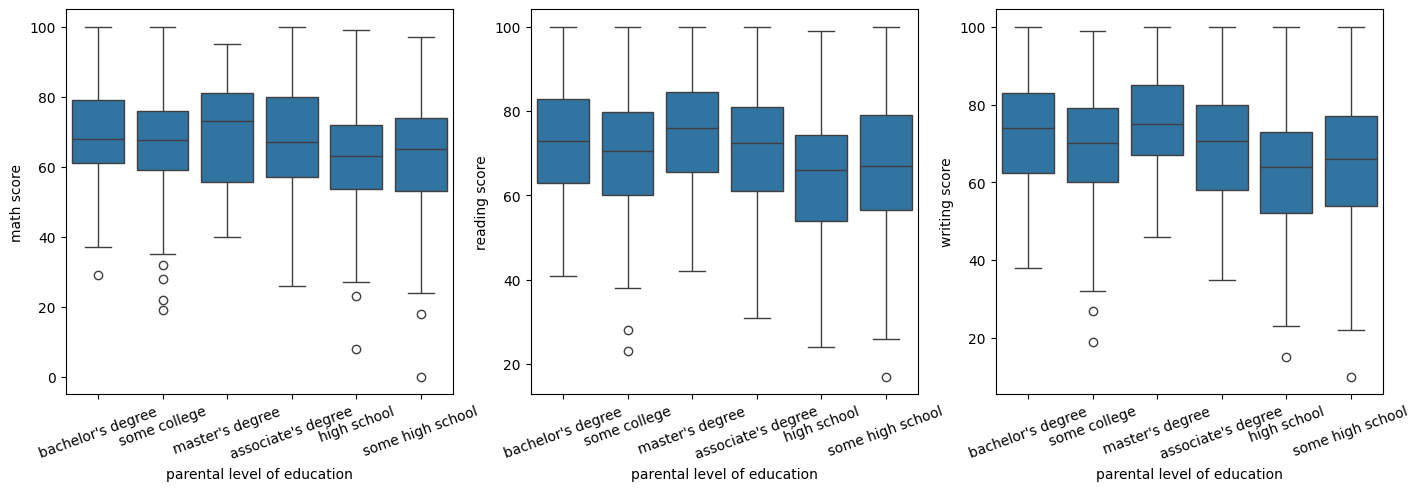

In [ ]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = [ 'parental level of education']
boxpl(data, x_cols, y_cols)

<h3> Définissez une fonction qui prend une note et renvoie le nombre d'étudiants qui ont la note donnée pour chaque examen. </h3>

In [ ]:
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt

def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )


<h2> Ajouter des rations relatives par variable </h2> <h5>(par exemple, les notes d'examen pour les femmes au total donneront 1, et le nombre sur le graphique sera le pourcentage de femmes qui ont obtenu la note d'examen particulière)</h5>
<h3>
Tracez une carte thermique avec les notes de mathématiques, de lecture et d'écriture sur l'axe des x et différentes variables sur l'axe des y, et affichez le pourcentage relatif d'étudiants ayant obtenu le score donné dans la valeur de la variable y.
</h3>
<h4>
Le graphique montre aux étudiants quelles valeurs de variables obtiennent de meilleures notes et lesquelles obtiennent de moins bonnes notes ou échouent même. </h4>


<h3> Obtenez le nombre d'étudiants qui ont échoué (F) et le nombre d'étudiants qui ont obtenu des résultats de distinction (A) aux examens. </h3>

In [ ]:
print('F')
MarkCounts(data, ['F'])
print('\n A')
MarkCounts(data, ['A'])

F
Math: 150 
 Writing: 124 
 Reading: 97 
 
 Math and Reading: 66 
 Math and Writing: 78 
 Reading and Writing: 85 
 
 All: 62

 A
Math: 50 
 Writing: 68 
 Reading: 62 
 
 Math and Reading: 26 
 Math and Writing: 28 
 Reading and Writing: 46 
 
 All: 23


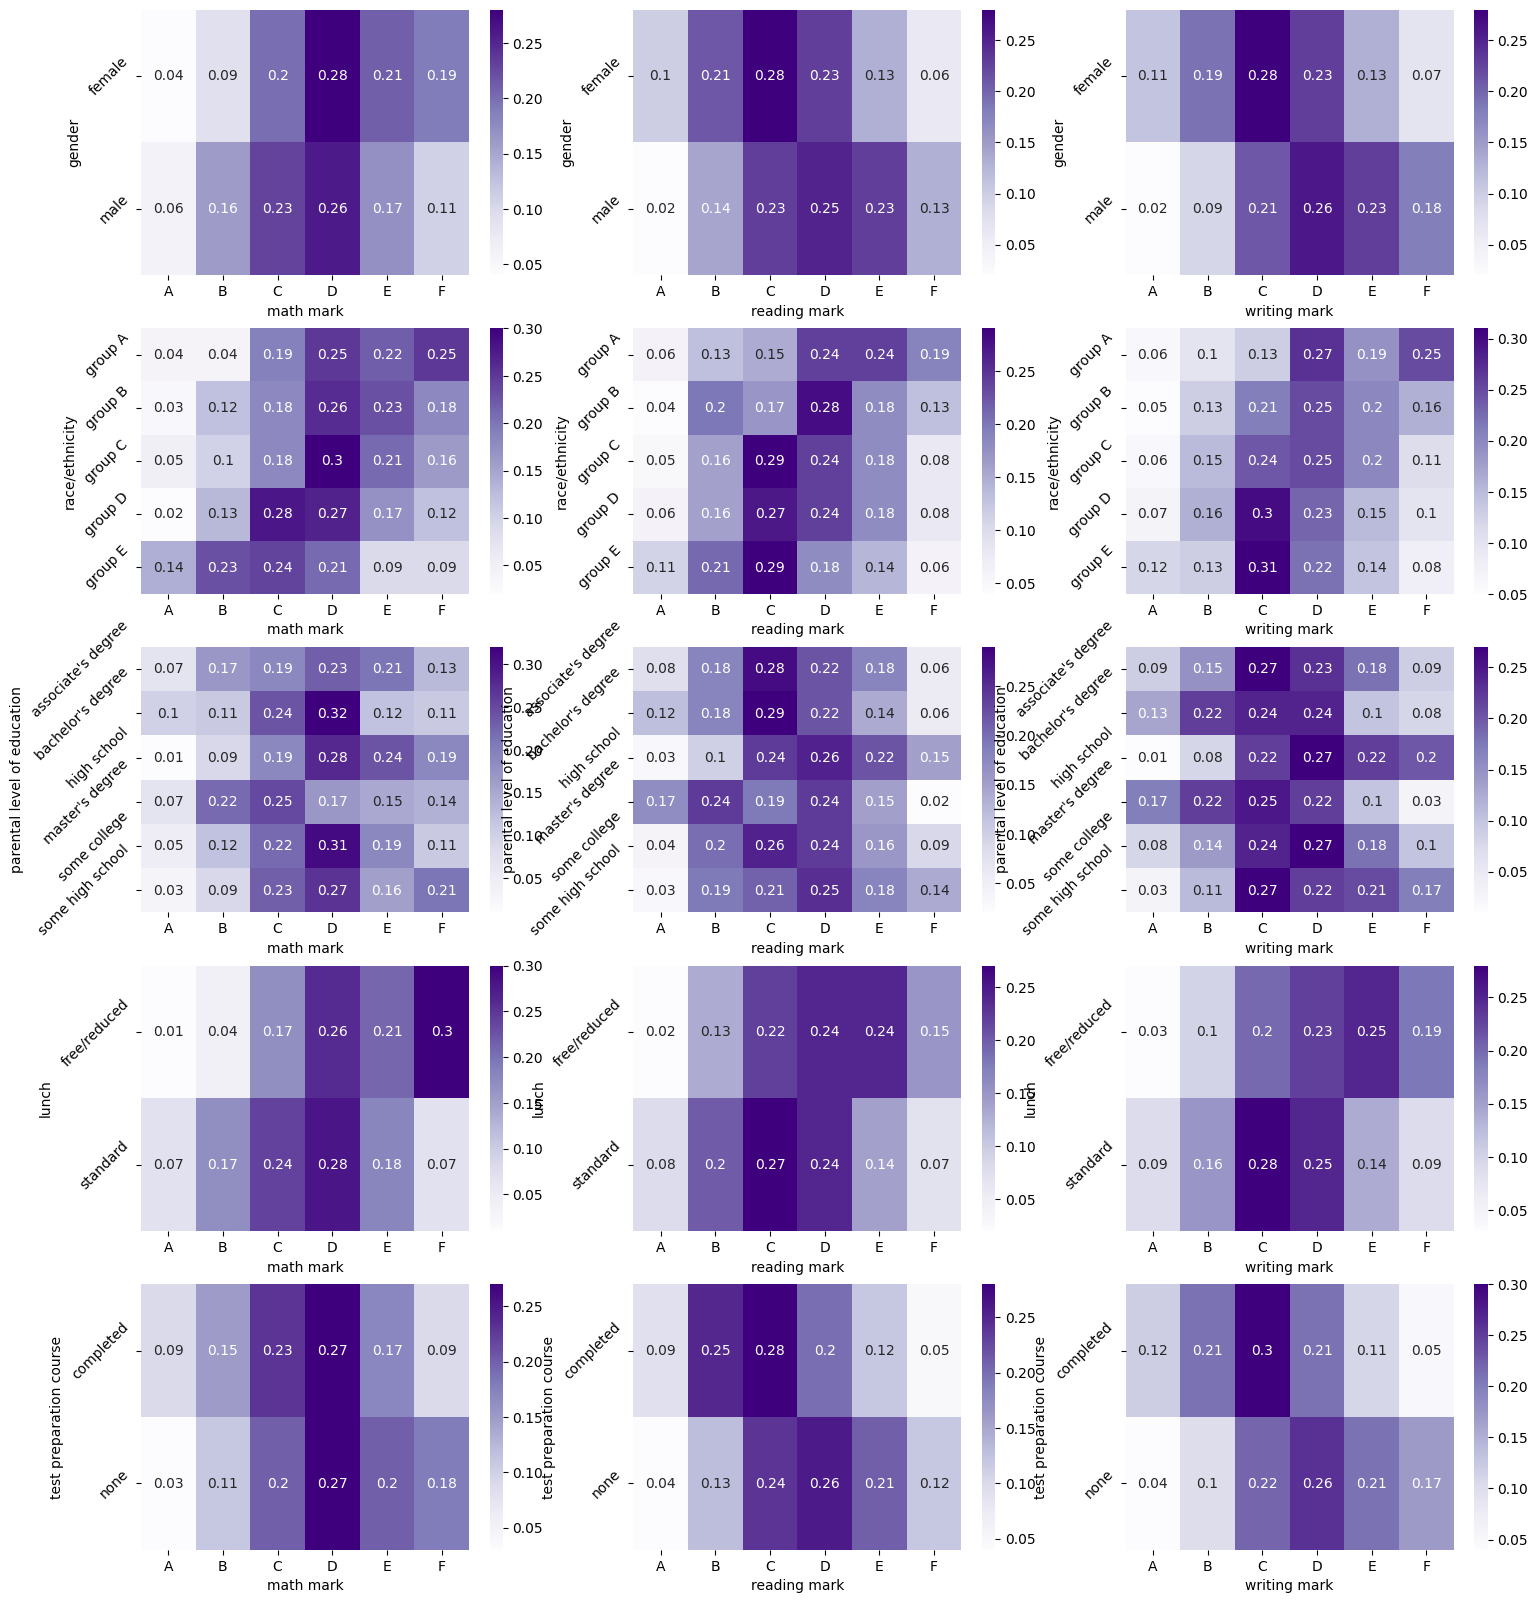

In [ ]:
# Relative ratios have been added.

figure = plt.figure(figsize=(18,20))
n = 1
for k in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    for i in ['math mark', 'reading mark', 'writing mark']:
        tab = pd.crosstab(data[k], data[i])
        tab['total'] = (tab['A'] + tab['B'] + tab['C'] + tab['D'] + tab['E'] + tab['F'])
        tab['A'] = round(tab['A'] / tab['total'], 2)
        tab['B'] = round(tab['B'] / tab['total'], 2)
        tab['C'] = round(tab['C'] / tab['total'], 2)
        tab['D'] = round(tab['D'] / tab['total'], 2)
        tab['E'] = round(tab['E'] / tab['total'], 2)
        tab['F'] = round(tab['F'] / tab['total'], 2)
        tab = tab.drop(columns=['total'])
        ax = figure.add_subplot(5, 3, n)
        #ax.set_title(i)
        g = sns.heatmap(tab, annot=True, cmap='Purples', fmt='g')
        g.set_yticklabels(g.get_yticklabels(), rotation=45)
        n = n + 1

<h1>Prédire les échecs aux examens des étudiants grâce aux méthodes de classification </h1>

<h3>Importer des bibliothèques depuis sklearn</h3>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.svm.libsvm import predict_proba
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

<h3>modifier l'étiquette : échoué = 1 (si l'étudiant a échoué à 1 ou plusieurs examens) et échoué = 0 (si l'étudiant n'a échoué à aucun examen) </h3>

In [ ]:

def hasFailed(dt):
    if ((dt['math mark'] == 'F') | (dt['reading mark'] == 'F') | (dt['writing mark'] == 'F')):
        return 1
    else:
        return 0
data['failed'] = data.apply(hasFailed, axis=1)

<h3>Ajoutez un encodage à chaud : transformez les variables textuelles en binaires </h3>

In [ ]:
classification_data = data[[
                              'gender'
                            , 'race/ethnicity'
                            , 'parental level of education'
                            , 'lunch'
                            , 'test preparation course'
                            , 'failed'
                           ]]

In [ ]:
text_columns = [
  'gender'
, 'race/ethnicity'
, 'parental level of education'
, 'lunch'
, 'test preparation course']

classification_data = pd.get_dummies(classification_data, columns=text_columns)
classification_data.head(6)
# print(classification_data.columns)

# classification_data.columns()

,failed,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,1,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
5,0,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True


<h3> Diviser l'ensemble de données en ensembles de données de travail d'entraînement/test et de validation (80/20). Les modèles seront entraînés et testés sur l'ensemble de données de travail principal, mais pour la validation des résultats des modèles, nous utiliserons l'ensemble de données de validation </h3>

In [ ]:
#Splitting data into main training and validation datasets, 80/20
classification_data.reset_index(level=[0], inplace=True)
data_train = classification_data.sample(int(np.floor(classification_data.shape[0] * 0.8)), random_state=999)
data_val = classification_data[np.logical_not(classification_data['index'].isin(data_train['index']))]
data_train = data_train.drop(columns = ['index'])
data_val = data_val.drop(columns = ['index'])
print(data_train[data_train['failed'] == 0].shape
    , data_train[data_train['failed'] == 1].shape
     , data_val.shape)


(648, 18) (152, 18) (200, 18)


<h3>L'ensemble de données de travail est déséquilibré ; nous devons donc l'équilibrer.
Nous utiliserons la méthode du suréchantillonnage. </h3>

In [ ]:
#Oversampling: ge the needed oversample values

data_train_fail = data_train[data_train['failed'] == 1]
data_train_pass = data_train[data_train['failed'] == 0]

pass_n = data_train[data_train['failed'] == 0].shape[0]
fail_n = data_train[data_train['failed'] == 1].shape[0]
times_x = np.floor(pass_n / fail_n)
diff = int(pass_n - times_x * fail_n)

print(times_x, diff)

4.0 40


In [ ]:
#Oversampling: concatenating oversampled data together.
data_train_over = pd.concat([data_train_pass,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail.sample(diff, random_state = 999)])
print(data_train_over[data_train_over['failed'] == 0].shape
    , data_train_over[data_train_over['failed'] == 1].shape
     , data_train_over.shape)

(648, 18) (648, 18) (1296, 18)


<h3>Diviser l'ensemble de données de travail en ensembles de données de test/d'entraînement et en étiquettes y </h3>

In [ ]:
#test_train_sample
X_train, X_test, y_train, y_test = train_test_split(
    data_train_over[data_train_over.columns.difference(['failed'])],
    data_train_over['failed'], test_size=0.3, random_state=999)

<h3>effectuer une recherche par grille pour trouver les paramètres les mieux adaptés au classificateur de forêt aléatoire </h3>

In [ ]:

param_grid = {
    'n_estimators': [8,9,10,11, 12,13, 14, 15, 16, 17, 18, 19, 20],
    'max_depth' : [5, 10, 15, 17, 18, 19, 20, 21, 23, 25],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_


{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 19}

texte en gras<h3>s'adapter aux différents modèles : SVM, SVM Poly, SVM rdf, forêt aléatoire, arbre de décision, knn avec différents nombres de voisins les plus proches. </h3>

In [ ]:

# SVM
svm = SVC(kernel = "linear").fit(X_train, y_train)
svm_poly = SVC(kernel = "poly", degree = 2, gamma = "auto").fit(X_train, y_train)
svm_rbf = SVC(kernel = "rbf", gamma="auto").fit(X_train, y_train)

#Random Forest
rf = RandomForestClassifier(n_estimators=19, max_depth = 15, criterion = 'gini', random_state = 999).fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(X_train, y_train)

# knn
knn1 = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn7 = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn9 = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
knn11 = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
knn13 = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)
knn25 = KNeighborsClassifier(n_neighbors = 25).fit(X_train, y_train)

<h3> exécutez la prédiction sur le modèle ajusté et obtenez un score de précision. </h3>

In [ ]:
acc1 = accuracy_score(y_test, svm.predict(X_test))
acc2 = accuracy_score(y_test, svm_poly.predict(X_test))
acc3 = accuracy_score(y_test, svm_rbf.predict(X_test))

acc4 = accuracy_score(y_test, rf.predict(X_test))

acc5 = accuracy_score(y_test, dt.predict(X_test))

acc6 = accuracy_score(y_test, knn1.predict(X_test))
acc7 = accuracy_score(y_test, knn3.predict(X_test))
acc8 = accuracy_score(y_test, knn5.predict(X_test))
acc9 = accuracy_score(y_test, knn7.predict(X_test))
acc10 = accuracy_score(y_test, knn9.predict(X_test))
acc11 = accuracy_score(y_test, knn11.predict(X_test))
acc12 = accuracy_score(y_test, knn13.predict(X_test))
acc13 = accuracy_score(y_test, knn25.predict(X_test))

print('\n svm', acc1
      , '\n svm poly', acc2
      , '\n svm rbf', acc3
      , '\n random forest', acc4
      , '\n decision tree', acc5
      , '\n 1nn', acc6
      , '\n 3nn', acc7
      , '\n 5nn', acc8
      , '\n 7nn', acc9
      , '\n 9nn', acc10
      , '\n 11nn', acc11
      , '\n 13nn', acc12
      , '\n 25nn', acc13)


 svm 0.6760925449871465 
 svm poly 0.6760925449871465 
 svm rbf 0.6915167095115681 
 random forest 0.7326478149100257 
 decision tree 0.712082262210797 
 1nn 0.6966580976863753 
 3nn 0.6786632390745502 
 5nn 0.6940874035989717 
 7nn 0.7197943444730077 
 9nn 0.6889460154241646 
 11nn 0.6940874035989717 
 13nn 0.6915167095115681 
 25nn 0.7043701799485861


<h3> Exécutez des modèles sur un ensemble de données de validation et observez les résultats de précision. </h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Préparation des données
val_x = data_val[data_val.columns.difference(['failed'])]
val_y = data_val['failed']
train_x = data_train[data_train.columns.difference(['failed'])]
train_y = data_train['failed']

# Entraînement et évaluation des modèles
svm_model = SVC(kernel="rbf", gamma="auto")
svm_model.fit(train_x, train_y)
print('SVM rbf', accuracy_score(val_y, svm_model.predict(val_x)))

# Sauvegarder le modèle SVM entraîné


# Autres modèles (optionnels pour comparaison)
rf_model = RandomForestClassifier(n_estimators=12, max_depth=10, criterion='gini', random_state=999)
rf_model.fit(train_x, train_y)
print('random forest', accuracy_score(val_y, rf_model.predict(val_x)))
joblib.dump(rf_model, "svm_model.pkl")
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=999)
dt_model.fit(train_x, train_y)
print('decision tree', accuracy_score(val_y, dt_model.predict(val_x)))

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_x, train_y)
print('3nn KNN', accuracy_score(val_y, knn_model.predict(val_x)))


SVM rbf 0.74
random forest 0.725
decision tree 0.715
3nn KNN 0.715


<h3> Vérifiez la matrice de confusion pour chacune de ces prédictions de modèle sur les données de validation </h3>

In [ ]:
from sklearn.metrics import confusion_matrix

print('SVM rbf')
y_pred = SVC(kernel = "rbf", gamma="auto").fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))



print(' \n Random Forest')
y_pred = RandomForestClassifier(n_estimators=12, max_depth = 10, criterion = 'gini', random_state = 999).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))


print(' \n Decision Tree')
y_pred = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))


print(' \n KNN 3 nearest neighbours')
y_pred = KNeighborsClassifier(n_neighbors = 3).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))


SVM rbf
Confusion matrix:
[[148   0]
 [ 52   0]]
True Negative: 148 , False Positive: 0 , False Negative: 52 , True Positive: 0
 
 Random Forest
Confusion matrix:
[[136  12]
 [ 43   9]]
True Negative: 136 , False Positive: 12 , False Negative: 43 , True Positive: 9
 
 Decision Tree
Confusion matrix:
[[137  11]
 [ 46   6]]
True Negative: 137 , False Positive: 11 , False Negative: 46 , True Positive: 6
 
 KNN 3 nearest neighbours
Confusion matrix:
[[136  12]
 [ 45   7]]
True Negative: 136 , False Positive: 12 , False Negative: 45 , True Positive: 7


In [ ]:
import joblib

model = joblib.load("svm_model.pkl")


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact_manual
import numpy as np
import joblib

# Charger le modèle
model = joblib.load("svm_model.pkl")

# Fonction de prédiction
def predict(
    gender_female=0, gender_male=1,
    race_A=0, race_B=0, race_C=1, race_D=0, race_E=0,
    edu_associate=0, edu_bachelor=1, edu_highschool=0, edu_master=0, edu_college=0, edu_somehigh=0,
    lunch_free=0, lunch_standard=1,
    prep_completed=1, prep_none=0
):
    input_data = [gender_female, gender_male,
                  race_A, race_B, race_C, race_D, race_E,
                  edu_associate, edu_bachelor, edu_highschool,
                  edu_master, edu_college, edu_somehigh,
                  lunch_free, lunch_standard,
                  prep_completed, prep_none]

    prediction = model.predict(np.array(input_data).reshape(1, -1))
    print("Résultat :", "Failed" if prediction[0] == 1 else "Not Failed")

# Créer l'interface
ui = interact_manual(
    predict,
    gender_female=widgets.Dropdown(options=[0,1]),
    gender_male=widgets.Dropdown(options=[0,1]),
    race_A=widgets.Dropdown(options=[0,1]),
    race_B=widgets.Dropdown(options=[0,1]),
    race_C=widgets.Dropdown(options=[0,1]),
    race_D=widgets.Dropdown(options=[0,1]),
    race_E=widgets.Dropdown(options=[0,1]),
    edu_associate=widgets.Dropdown(options=[0,1]),
    edu_bachelor=widgets.Dropdown(options=[0,1]),
    edu_highschool=widgets.Dropdown(options=[0,1]),
    edu_master=widgets.Dropdown(options=[0,1]),
    edu_college=widgets.Dropdown(options=[0,1]),
    edu_somehigh=widgets.Dropdown(options=[0,1]),
    lunch_free=widgets.Dropdown(options=[0,1]),
    lunch_standard=widgets.Dropdown(options=[0,1]),
    prep_completed=widgets.Dropdown(options=[0,1]),
    prep_none=widgets.Dropdown(options=[0,1])
)



interactive(children=(Dropdown(description='gender_female', options=(0, 1), value=0), Dropdown(description='ge…

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact_manual, VBox, Label, HBox
import numpy as np
import joblib

# Charger le modèle
model = joblib.load("svm_model.pkl")

# Fonction de prédiction
def predict(
    gender, race, education, lunch, test_prep
):
    # Transformer les entrées en one-hot
    gender_female = 1 if gender == "Female" else 0
    gender_male = 1 if gender == "Male" else 0

    race_options = ["Group A", "Group B", "Group C", "Group D", "Group E"]
    race_encoding = [1 if race == r else 0 for r in race_options]

    edu_options = [
        "Associate's degree", "Bachelor's degree", "High school",
        "Master's degree", "Some college", "Some high school"
    ]
    edu_encoding = [1 if education == e else 0 for e in edu_options]

    lunch_free = 1 if lunch == "Free/Reduced" else 0
    lunch_standard = 1 if lunch == "Standard" else 0

    prep_completed = 1 if test_prep == "Completed" else 0
    prep_none = 1 if test_prep == "None" else 0

    # Concaténer toutes les variables dans l'ordre attendu
    input_data = [gender_female, gender_male] + race_encoding + edu_encoding + [lunch_free, lunch_standard] + [prep_completed, prep_none]

    # Vérification de l'entrée
    print(f"Input Data: {input_data}")  # Ajoute cette ligne pour voir la structure

    input_array = np.array(input_data).reshape(1, -1)

    # Prédiction
    prediction = model.predict(input_array)
    print("Résultat :", "✅ Not Failed" if prediction[0] == 0 else "❌ Failed")

# Widgets avec meilleurs affichages
gender_widget = widgets.ToggleButtons(
    options=["Male", "Female"],
    description='Gender:',
    style={'description_width': 'initial'}
)

race_widget = widgets.Dropdown(
    options=["Group A", "Group B", "Group C", "Group D", "Group E"],
    description='Race/Ethnicity:',
    style={'description_width': 'initial'}
)

education_widget = widgets.Dropdown(
    options=[
        "Associate's degree", "Bachelor's degree", "High school",
        "Master's degree", "Some college", "Some high school"
    ],
    description='Parental Education:',
    style={'description_width': 'initial'}
)

lunch_widget = widgets.RadioButtons(
    options=["Standard", "Free/Reduced"],
    description='Lunch:',
    style={'description_width': 'initial'}
)

prep_widget = widgets.RadioButtons(
    options=["Completed", "None"],
    description='Test Prep:',
    style={'description_width': 'initial'}
)

# Interface propre et organisée
ui = VBox([
    Label("🧠 Student Performance Prediction"),
    gender_widget,
    race_widget,
    education_widget,
    lunch_widget,
    prep_widget
])

# Intégration de la fonction interact_manual
interact_manual(
    predict,
    gender=gender_widget,
    race=race_widget,
    education=education_widget,
    lunch=lunch_widget,
    test_prep=prep_widget
)


interactive(children=(ToggleButtons(description='Gender:', options=('Male', 'Female'), style=ToggleButtonsStyl…

<function __main__.predict(gender, race, education, lunch, test_prep)>

<h4>Il semble que le modèle présentant le meilleur score de précision, SVM avec rbf, ne prédit que les valeurs négatives. Les données de validation étant déséquilibrées, sa précision est élevée. Autrement dit, le modèle le plus performant dans notre cas présente la même précision que le modèle à prédiction aléatoire, celui qui ne prédit que les valeurs négatives. </h4>